## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_10-18-05-23.csv', firstRow=444, lastRow=450)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_150523_S445-450.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=54s and ended at t=470s; mass=44.6485g
This equals a volume of 44.738m; expected was 44.777mL; error is 0.087%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.0015 g/s and for 2nd derivative = 0.000375 g/s^2


<IPython.core.display.Javascript object>


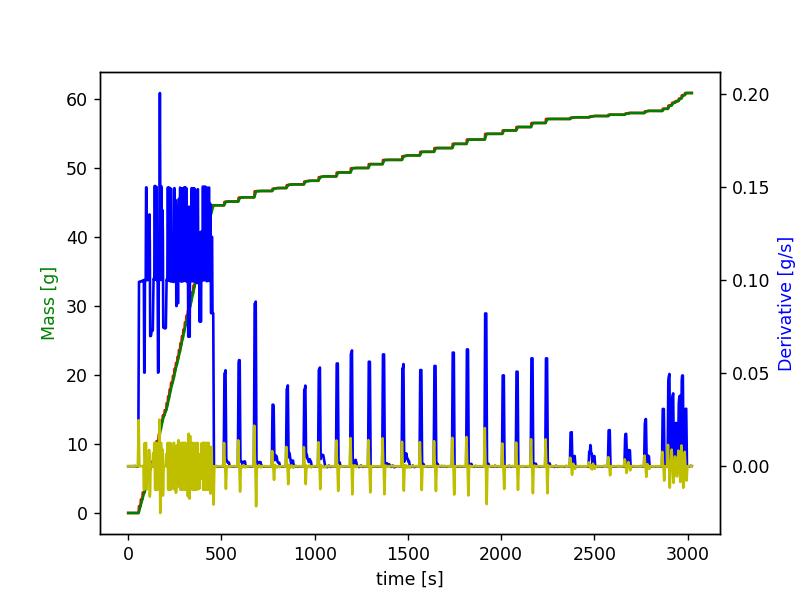

Addition of 0.548g Plantapon ACG 50 detected from 510s to 546s - expected volume = 0.521mL and actual volume = 0.482mL (resulting error is 7.477%)
Addition of 0.619g Plantapon ACG 50 detected from 586s to 632s - expected volume = 0.521mL and actual volume = 0.545mL (resulting error is 4.54%)
Addition of 0.92g Plantapon ACG 50 detected from 672s to 716s - expected volume = 0.792mL and actual volume = 0.815mL (resulting error is 2.919%)
Addition of 0.435g Plantapon LC 7 detected from 768s to 816s - expected volume = 0.513mL and actual volume = 0.414mL (resulting error is 19.276%)
Addition of 0.529g Plantapon LC 7 detected from 844s to 892s - expected volume = 0.513mL and actual volume = 0.503mL (resulting error is 1.855%)
Addition of 0.531g Plantacare 818 detected from 938s to 986s - expected volume = 0.561mL and actual volume = 0.489mL (resulting error is 12.841%)
Addition of 0.64g Plantacare 818 detected from 1016s to 1058s - expected volume = 0.561mL and actual volume = 0.59mL (result

In [3]:
# default: bl_mult=5, mergeSens=10
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

#t2 = massProfile.defineIngredientsManually(specType='surfactant',steps=steps,show=True,manualTimes=[560,600,700,800,900,1000,1100,1150,1250,1320,1400,1500,1580,1650,1730,1830,1920,2000,2080,2140])

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.0021875 g/s and for 2nd derivative = 0.000546875 g/s^2


<IPython.core.display.Javascript object>


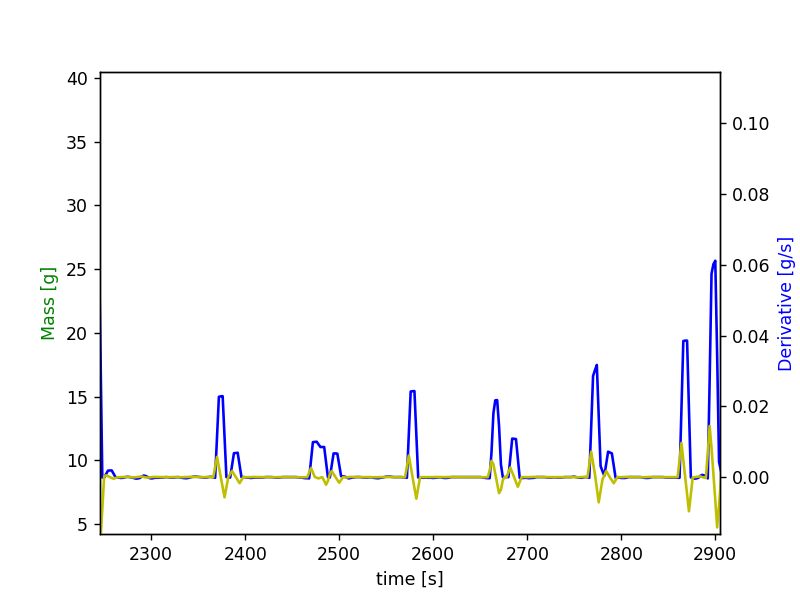

Addition of 0.236g Dehyquart CC6 detected from 2366s to 2400s - expected volume = 0.211mL and actual volume = 0.223mL (resulting error is 5.605%)
Addition of 0.199g Dehyquart CC6 detected from 2466s to 2506s - expected volume = 0.099mL and actual volume = 0.188mL (resulting error is 89.524%)
Addition of 0.192g Dehyquart CC6 detected from 2570s to 2588s - expected volume = 0.124mL and actual volume = 0.183mL (resulting error is 47.692%)
Addition of 0.256g Dehyquart CC6 detected from 2658s to 2696s - expected volume = 0.151mL and actual volume = 0.244mL (resulting error is 62.184%)
Addition of 0.308g Dehyquart CC6 detected from 2764s to 2798s - expected volume = 0.259mL and actual volume = 0.294mL (resulting error is 13.419%)
Addition of 0.305g Dehyquart CC6 detected from 2860s to 2878s - expected volume = 0.136mL and actual volume = 0.285mL (resulting error is 109.075%)


In [4]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

#t3 = massProfile.defineIngredientsManually(specType='polyelectrolyte',steps=steps,show=True,manualTimes=[2014,2112,2210,2314,2412,2494,2564])

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.001 g/s^2


<IPython.core.display.Javascript object>


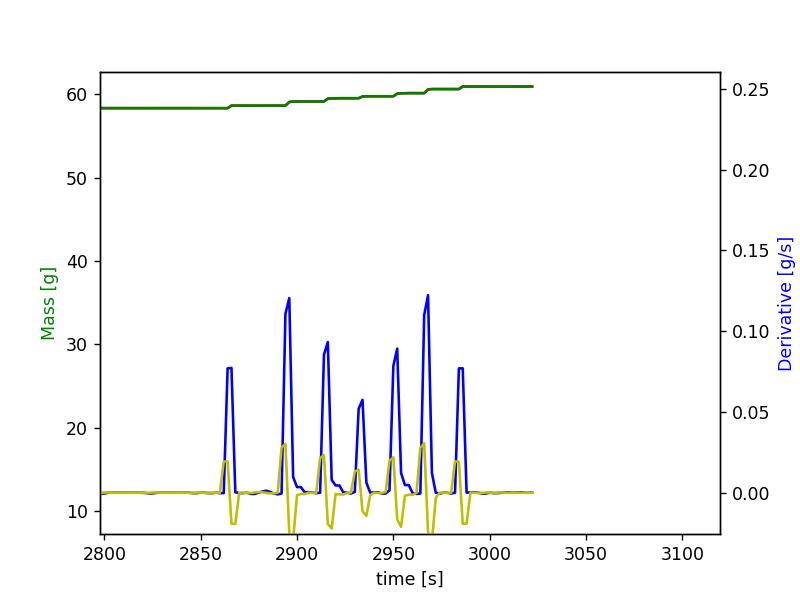

Addition of 0.492g Arlypon TT detected from 2890s to 2904s - expected volume = 0.517mL and actual volume = 0.512mL (resulting error is 0.905%)
Addition of 0.391g Arlypon TT detected from 2910s to 2922s - expected volume = 0.295mL and actual volume = 0.407mL (resulting error is 37.676%)
Addition of 0.251g Arlypon TT detected from 2922s to 2942s - expected volume = 0.144mL and actual volume = 0.263mL (resulting error is 83.212%)
Addition of 0.377g Arlypon TT detected from 2946s to 2964s - expected volume = 0.305mL and actual volume = 0.395mL (resulting error is 29.553%)
Addition of 0.486g Arlypon TT detected from 2964s to 2976s - expected volume = 0.451mL and actual volume = 0.509mL (resulting error is 12.907%)
Addition of 0.308g Arlypon TT detected from 2980s to 2992s - expected volume = 0.213mL and actual volume = 0.316mL (resulting error is 48.077%)


In [5]:
# default bl_mult = 1, default mergeSens = 1
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=1, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

#t4 = massProfile.defineIngredientsManually(specType='thickener',steps=steps,show=True,manualTimes=[2780,2834,2844,2848,2862,2884,2906])

## Consolidate results and create output

In [ ]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_150523_S43-S444.csv', index=False)
actualMassFractions